<a href="https://colab.research.google.com/github/jesivan-t/cpe310_damayo/blob/main/Team_3_Final_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team 3**

**Yasmin Tricia Claridad, Jes Ivan Damayo** | IE22S2 | CPE 310 - Fundamentals of Data Science | Final Case Study


# **1. Data Loading & Overview**

In [10]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# **2. Data Cleaning**

In [ ]:
# Check which columns have missing data or values

print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df["director"].fillna("No Data", inplace = True)
df["cast"].fillna("No Data", inplace = True)
df["country"].fillna(df["country"].mode()[0], inplace = True)
df["date_added"].fillna(df["date_added"].mode()[0], inplace = True)
df["rating"].fillna(df["rating"].mode()[0], inplace = True)
df["duration"].fillna(df["duration"].mode()[0], inplace = True)

print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


<ipython-input-5-ce92f53ffaa1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("No Data", inplace = True)
<ipython-input-5-ce92f53ffaa1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

# **3. Data Types & Conversion**

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


# **4. Univariate Analysis**

In [ ]:
# How many movies vs. TV shows are there?

df.type.value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
# What are the top five most common ratings?

df_top_five = df['rating'].value_counts().nlargest(5)

print(df_top_five)

rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


In [ ]:
df['release_year'].mode()[0]

np.int64(2018)

# **5. Duration & Seasons**

In [ ]:
df['movie_duration'] = df.apply(lambda row: int(row['duration'].split()[0]) if row['type'] == 'Movie' else None, axis=1)

df['tv_seasons'] = df.apply(lambda row: int(row['duration'].split()[0]) if row['type'] == 'TV Show' else None, axis=1)

avg_movie_length = df['movie_duration'].mean()

avg_tv_seasons = df['tv_seasons'].mean()

print(f"Average Movie Length: {avg_movie_length:.2f} minutes")
print(f"Average TV Show Seasons: {avg_tv_seasons:.2f} seasons")

Average Movie Length: 99.53 minutes
Average TV Show Seasons: 1.76 seasons


# **6. Genre Analysis**

In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

average_release_year = df.groupby('listed_in')['release_year'].mean().reset_index()
highest_avg_genre = average_release_year.loc[average_release_year['release_year'].idxmax()]

print(f"Genre with the highest average release year: {highest_avg_genre['listed_in']}")
print(f"Average release year: {int(highest_avg_genre['release_year'])}")

Genre with the highest average release year: Action & Adventure, Anime Features
Average release year: 2021


# **7. Temporal Trends**

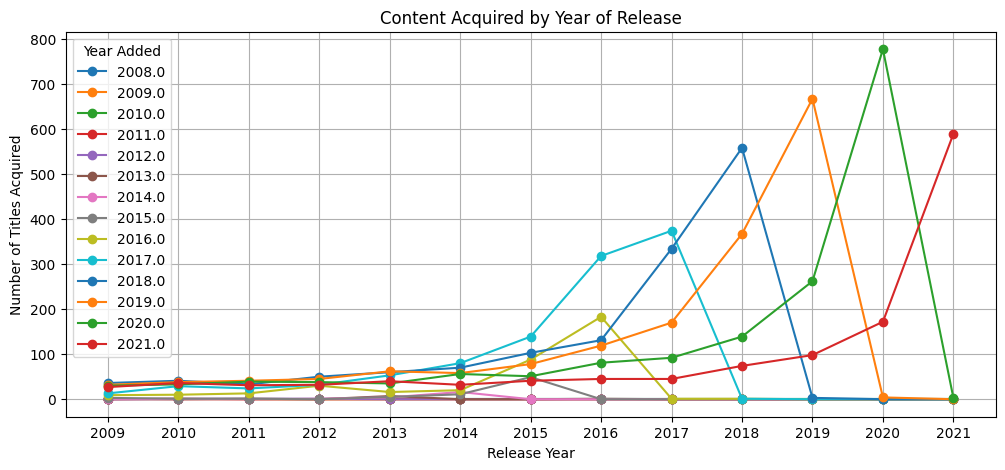

Average time between release and acquisition: 4.69 years


In [11]:
import matplotlib.pyplot as plt

df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['release_year'] = df['release_year'].dt.year
df['year_added'] = df['date_added'].dt.year

content_acquired = df.groupby(['release_year', 'year_added']).size().unstack(fill_value=0)

content_acquired = content_acquired[content_acquired.index > 2008]

plt.figure(figsize=(12, 5))

for year in content_acquired.columns:
    plt.plot(content_acquired.index, content_acquired[year], marker='o', label=year)

plt.title('Content Acquired by Year of Release')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Acquired')
plt.grid()
plt.xticks(content_acquired.index)
plt.legend(title='Year Added')
plt.show()

time_diff = df['year_added'] - df['release_year']
ave_diff = time_diff.mean()

print(f'Average time between release and acquisition: {ave_diff:.2f} years')

# **8. Rating vs. Type**

In [5]:
pd.crosstab(df['type'], df['rating'])

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1,1,1,41,3,75,287,490,797,1427,126,2062,540,131,139,5,3
TV Show,0,0,0,0,0,5,0,0,2,733,94,1145,323,176,195,1,0


In [9]:
df.groupby('type')['rating'].agg(lambda x: x.mode()[0])

,rating
type,
Movie,TV-MA
TV Show,TV-MA


# **9. Filtering & Querying**

In [ ]:
dateafter2020 = pd.to_datetime('2021-01-01')
df[(df['rating'] == 'R') & (df['date_added'] > dateafter2020)].rating.value_counts()

,count
rating,
R,174


# **10. Aggregations & GroupBy**

In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

avg_release_year_by_country = df.groupby('country')['release_year'].mean().reset_index()
avg_release_year_by_country.columns = ['country', 'average_release_year']
avg_release_year_by_country['average_release_year'] = avg_release_year_by_country['average_release_year'].round().astype(int)

df['year_added'] = pd.to_datetime(df['date_added']).dt.year

type_counts = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

type_proportions = type_counts.div(type_counts.sum(axis=1), axis=0) * 100
type_proportions = type_proportions.round().astype(int)

print("Average Release Year by Country:")
print(avg_release_year_by_country)

print("\nProportion of Movies vs. TV Shows added each year:")
print(type_proportions)

Average Release Year by Country:
                                               country  average_release_year
0                                    , France, Algeria                  2014
1                                        , South Korea                  2021
2                                            Argentina                  2016
3    Argentina, Brazil, France, Poland, Germany, De...                  2017
4                                     Argentina, Chile                  2012
..                                                 ...                   ...
743                                          Venezuela                  2017
744                                Venezuela, Colombia                  2007
745                                            Vietnam                  2018
746                                       West Germany                  1977
747                                           Zimbabwe                  2017

[748 rows x 2 columns]

Proportion of Movi

# **11. Applying Functions**

In [ ]:
def get_director_titles(df, director_name):
    filtered_df = df[df['director'] == director_name]

    sorted_df = filtered_df.sort_values(by='release_year')

    titles = sorted_df['title'].tolist()

    return titles

director_name = 'Cathy Garcia-Molina'
titles = get_director_titles(df, director_name)
titles

['A Very Special Love',
 'You Changed My Life',
 'My Amnesia Girl',
 'Four Sisters and a Wedding',
 'It Takes a Man and a Woman',
 "She's Dating the Gangster",
 'A Second Chance',
 'Unexpectedly Yours',
 'My Ex & Whys',
 'Seven Sundays',
 'Three Words to Forever',
 'The Hows of Us',
 'Hello, Love, Goodbye']

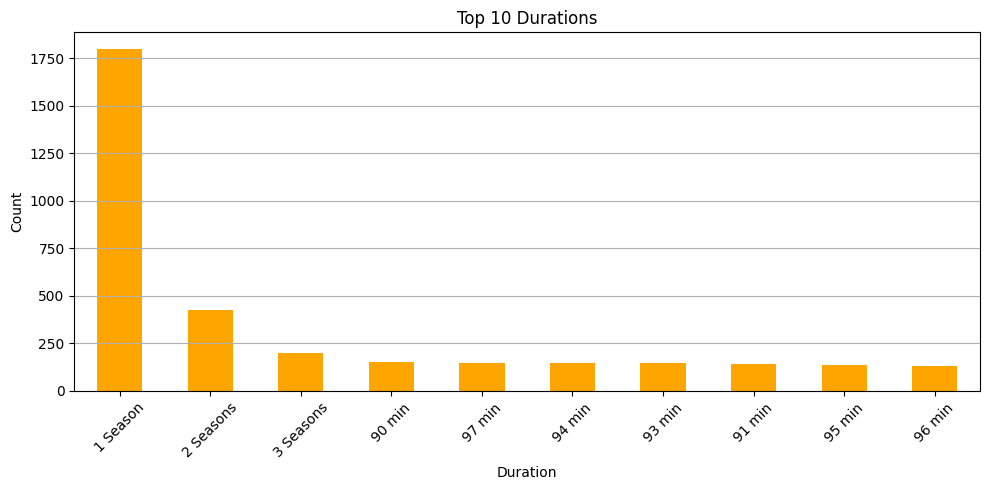

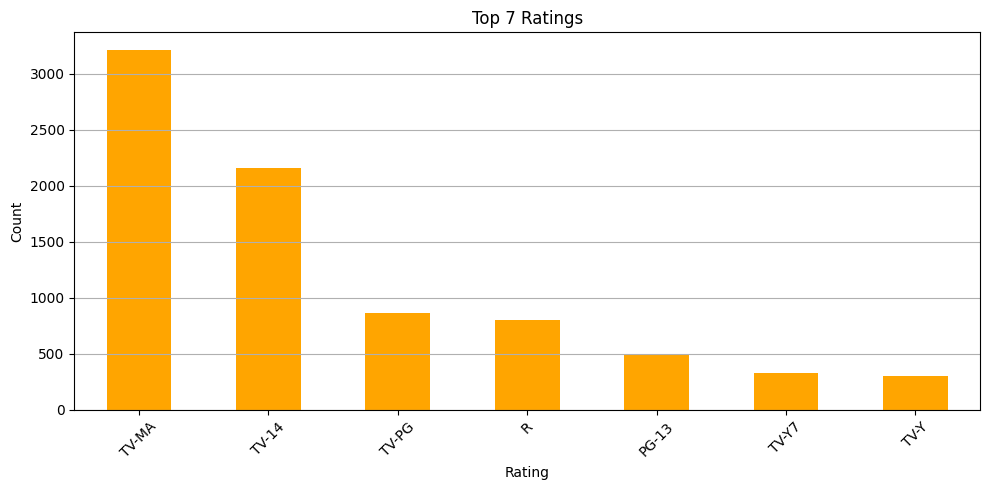

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_categories(column_name, top_n=10):
    plt.figure(figsize=(10, 5))

    value_counts = df[column_name].value_counts(dropna=True)
    filtered_counts = value_counts[value_counts > 0]

    filtered_counts.head(top_n).plot(kind='bar', color='orange')
    plt.title(f"Top {top_n} {column_name.capitalize()}s")
    plt.ylabel("Count")
    plt.xlabel(column_name.capitalize())
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_top_categories('duration', top_n=10)
plot_top_categories('rating', top_n=7)